In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# newlist = [expression for item in iterable if condition == True]
numerical_features = [x for x in df.columns if x not in ['sex', 'smoker', 'region']]
categorical_features = ['sex', 'smoker', 'region']

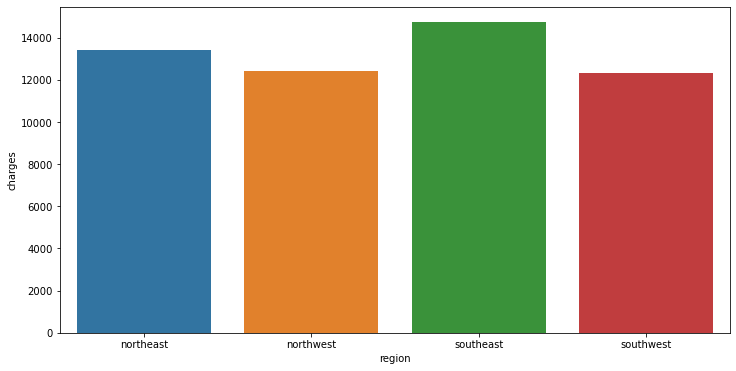

In [4]:
#How do charges vary based on the region
regional_mean = df.groupby('region')['charges'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=regional_mean, x='region', y='charges')
plt.show()

In [5]:
#EDA
print(df['age'].value_counts(),
df['sex'].value_counts(),
df['children'].value_counts(),
df['region'].value_counts())
df.info()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64 male      676
female    662
Name: sex, dtype: int64 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 no

In [6]:
encoder = OneHotEncoder()
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_features]).toarray(), columns=encoder.get_feature_names(categorical_features))
new_df = df.join(encoded_data)
new_df = new_df[['age',
 'bmi',
 'children',
 'charges',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']]
new_df
# rename_dict = {}
# new_df.columns
# new_df.rename()
# for col in encoded_columns:
#     for i in range(8):
#         rename_dict{f'{i}' : col}
# rename_dict

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


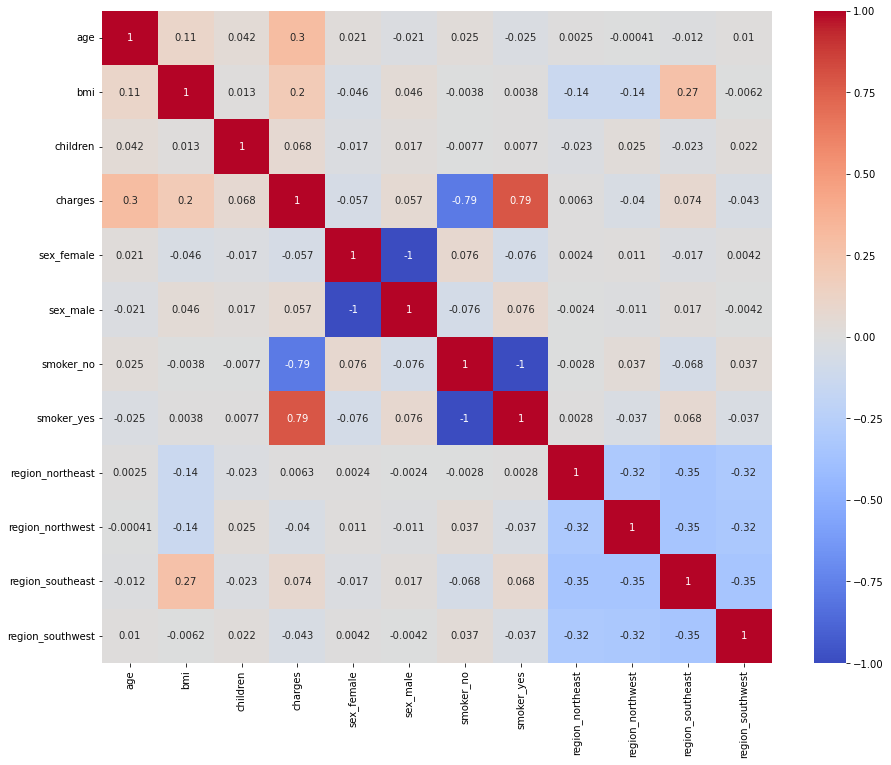

In [7]:
#Check the correlation of between features
data_corr = new_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data_corr, cmap='coolwarm', annot=True)
plt.show()

In [8]:
#correlation heatmap shows a high correlation between smokers and their insurance charge
#Age and bmi have a noticeable correlation with insurance premiums
#south east region has a noticeable correlation with bmi which could indicate that people may be charged more based on their location
#Men may be charged slightly more than women judging from the slight correlation with charges

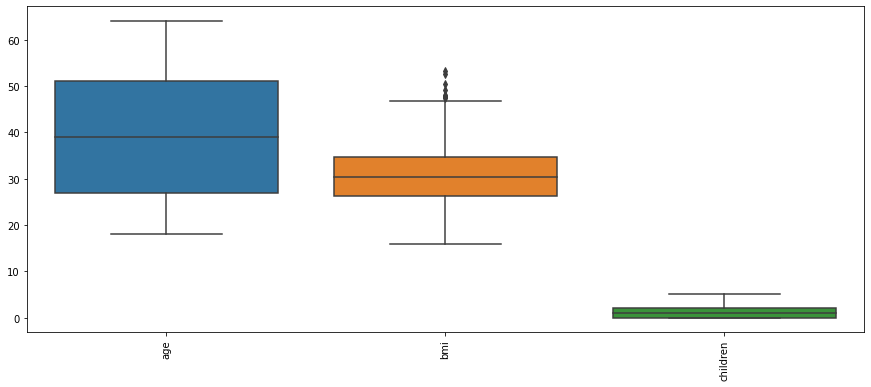

In [9]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
sns.boxplot(data=df[['age','bmi','children']])
plt.show()

/Users/jaishivbhalla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


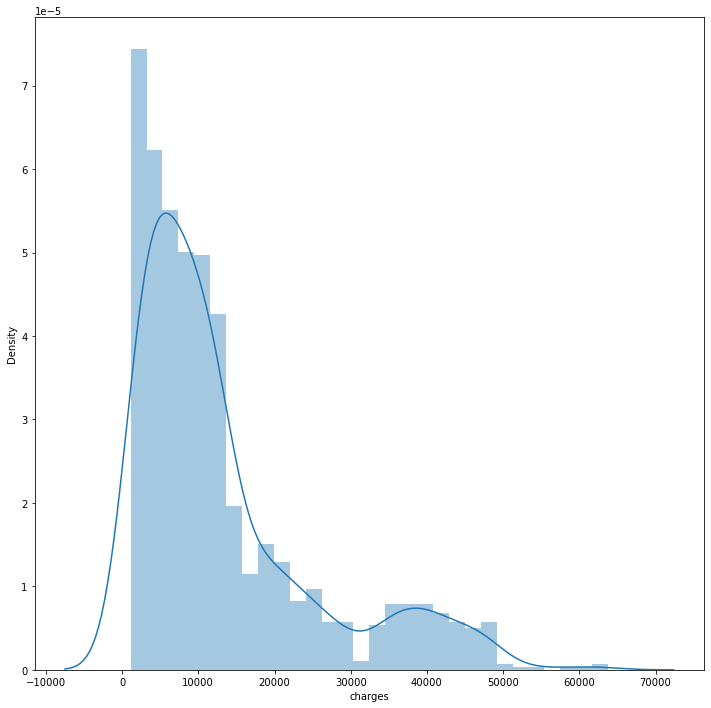

In [10]:
#Charges are continuous values hence we 
plt.figure(figsize=(12,12))
sns.distplot(df['charges'])
plt.show()

/Users/jaishivbhalla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


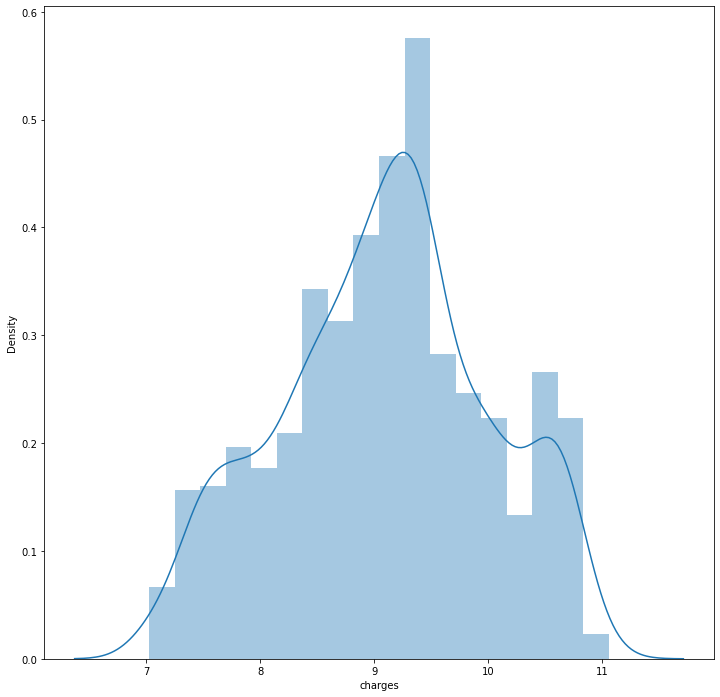

In [11]:
plt.figure(figsize=(12, 12))
sns.distplot(np.log1p(df['charges']))  # Using np.log1p to handle zero values
plt.show()

In [12]:
from scipy.stats import zscore

z_scores = zscore(df['charges'])
df_no_outliers = df[(z_scores < 3)] 

df_no_outliers.describe()

#There are 7 statistical outliers judging by the difference between the two dataframes

,age,bmi,children,charges
count,1331.000000,1331.000000,1331.00000,1331.000000
mean,39.185575,30.633017,1.09692,13036.775677
std,14.058021,6.088782,1.20603,11699.360324
min,18.000000,15.960000,0.00000,1121.873900
25%,26.000000,26.220000,0.00000,4719.630300
50%,39.000000,30.305000,1.00000,9301.893550
75%,51.000000,34.600000,2.00000,16359.170275
max,64.000000,53.130000,5.00000,49577.662400


/Users/jaishivbhalla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


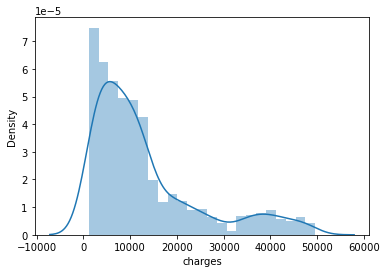

In [13]:
sns.distplot(df_no_outliers['charges'])
plt.show()

/Users/jaishivbhalla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jaishivbhalla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jaishivbhalla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

Text(0.5, 1.0, 'cube root')

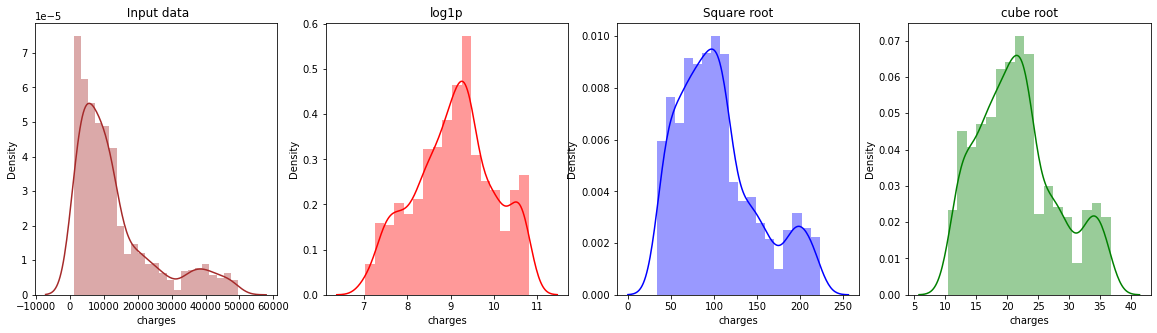

In [14]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((df_no_outliers['charges']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(df_no_outliers['charges']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(df_no_outliers['charges']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(df_no_outliers['charges']),ax=axes[3], color='green').set_title("cube root")

In [15]:
#Comparing the skew of the data after transformation
charges = df_no_outliers['charges']
charge_log = np.log(df_no_outliers['charges'])
print(f'skew of original data: {charges.skew()}')
print(f'skew of log-transformed data: {charge_log.skew()}')



skew of original data: 1.4525577790709245
skew of log-transformed data: -0.10565581016826023


In [16]:
#If the skew > 1 => data is highly skewed
#If the -0.5 < skew < 0.5 => the data is fairly symmetrical => data looks normally distributed
z_scores = zscore(new_df['charges'])
encoded_df_no_outliers = new_df[(z_scores < 3)]

X = encoded_df_no_outliers.drop('charges', axis=1)
y = charge_log

y.shape

(1331,)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11)
print(f'X_train:{X_train.shape}, X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}')


X_train:(798, 11), X_test:(533, 11), y_train:(798,), y_test:(533,)


In [62]:
#Building and scaling the model 
model = LinearRegression()
rob = RobustScaler()

X_train = rob.fit_transform(X_train)
X_test = rob.transform(X_test)

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

#Evaluating the accuracy of the model
R_2 = r2_score(y_test, y_hat)
MSE = mean_squared_error(y_test, y_hat)
print(f'r2_score: {R_2}, MSE: {MSE}')

r2_score: 0.7870630665619579, MSE: 0.1803406152938207


Text(0, 0.5, 'Predicted')

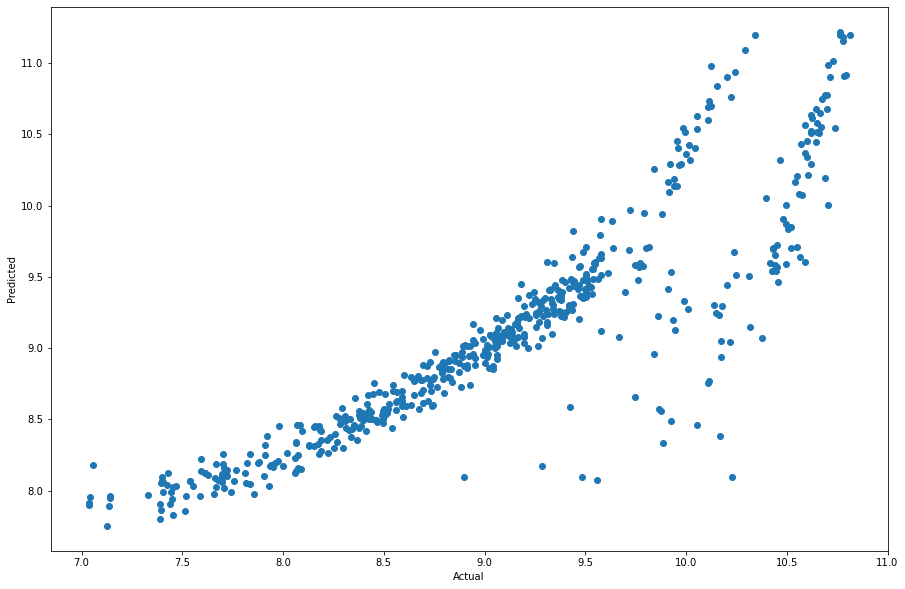

In [96]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_hat)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [64]:
#The model does not look like it follows a linear relationship and looks polynomial instead with a degree of 2

In [65]:
#creating a cross-validation set from the test set

In [80]:
#Adding polynomial features into the model
polys = []
train_mses = []
test_mses = []
scalers = []
models = []

for degree in range(1, 11):

#Transform input features into polynomial
    poly = PolynomialFeatures(degree=degree)
    X_trained_poly = poly.fit_transform(X_train)
    polys.append(poly)

#Scale transformed features
    scaler = StandardScaler()
    X_trained_poly_scaled = scaler.fit_transform(X_trained_poly)
    scalers.append(scaler)

#Build Linear Regression model
    model = LinearRegression()
    model.fit(X_trained_poly_scaled, y_train)
    models.append(model)
    
#Make predictions and calculate the training MSE
    y_hat_ = model.predict(X_trained_poly_scaled)
    train_mse = mean_squared_error(y_train, y_hat_)
    train_mses.append(train_mse)

#Transform test dataset into polynomial and scaling 
    X_test_poly = poly.transform(X_test)
    X_test_poly_scaled = scaler.transform(X_test_poly)

#Compute test MSE
    y_hat_test = model.predict(X_test_poly_scaled)
    test_mse = mean_squared_error(y_test, y_hat_test)
    test_mses.append(test_mse)
    

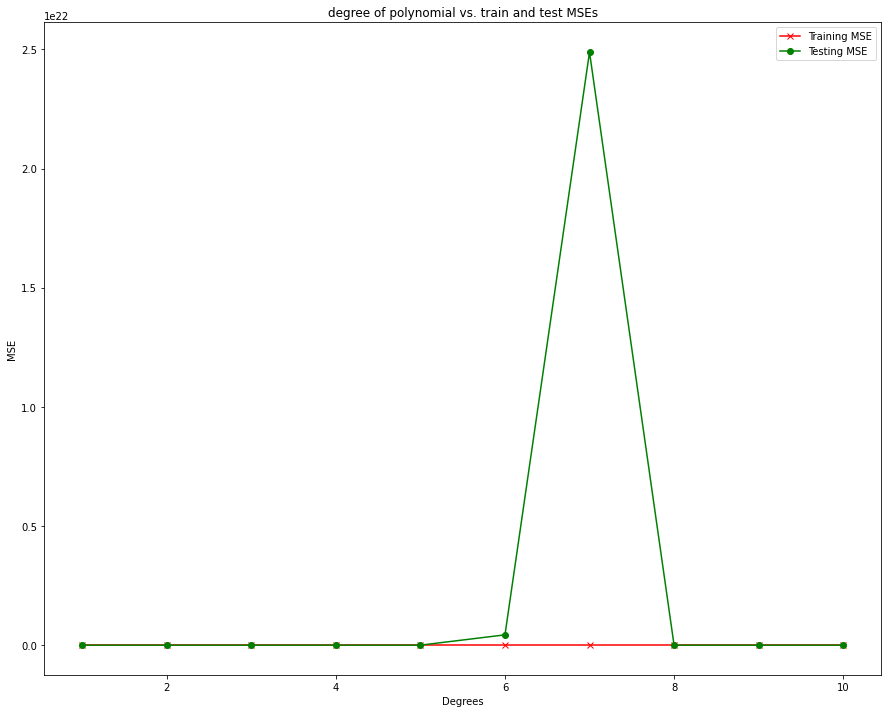

In [90]:
#plotting results
degrees = range(1,11)

plt.figure(figsize=(15,12))
plt.plot(degrees, train_mses, color='red', marker='x',label='Training MSE')
plt.plot(degrees, test_mses, color='green', marker='o', label='Testing MSE')
plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.title('degree of polynomial vs. train and test MSEs')
plt.legend()
plt.show()

In [97]:
#Finding the best model to use
degree = np.argmin(test_mses) + 1
print(f"Lowest test MSE is found in the model with degree={degree}")

Lowest test MSE is found in the model with degree=2


In [98]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(X_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat_test = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat_test) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f'r2_score: {r2_score(y_test, yhat_test)}')

Training MSE: 0.15
Test MSE: 0.06
r2_score: 0.85993415876313


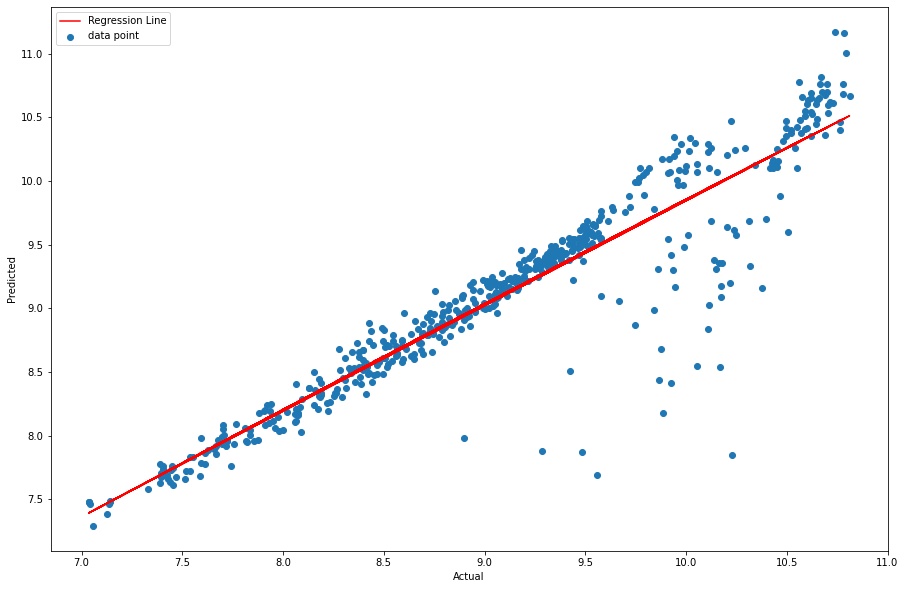

In [102]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, yhat_test, label='data point')
coefficients_open = np.polyfit(y_test, yhat_test, 2)
p_open = np.poly1d(coefficients_open)
plt.plot(y_test, p_open(y_test), '-', label='Regression Line', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()